In [10]:
import pandas as pd
pd.set_option('display.max_columns', 500)


In [11]:
# dataset.csv is the original file
data_df = pd.read_csv('Insurance_Marketing-Customer-Value-Analysis (1).csv')

In [12]:
data = data_df.values

In [13]:
data_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [12]:
data_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [13]:
data_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [14]:
# Number of variables of each type
data_df.Education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [15]:
data_df.Coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [14]:
## Defining two dictionaries converting 
## values from variable name to the column number and vice versa
from collections import defaultdict
var2ord = defaultdict()
ord2var = defaultdict()
for i,var in enumerate(data_df.columns):
    ord2var[i] = var
    var2ord[var] = i
    
data[0][var2ord['Customer Lifetime Value']]

2763.519279

In [17]:
data_df.State.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [18]:
(data_df.Education.value_counts())

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [15]:
# Making list of CLV wrt each corrsponding 
from collections import defaultdict
def cat_var_CLV(data, string):
    dictionary = {}
    for i in range(len(data)):
        if data[i][var2ord[string]] in dictionary.keys():
            dictionary[data[i][var2ord[string]]].append(data[i][var2ord['Customer Lifetime Value']])
        else:
            dictionary[data[i][var2ord[string]]] = []
            dictionary[data[i][var2ord[string]]].append(data[i][var2ord['Customer Lifetime Value']])
    return dictionary

In [16]:
import numpy as np
education = cat_var_CLV(data, 'Education')
state = cat_var_CLV(data, 'State')
response = cat_var_CLV(data, 'Response')
coverage = cat_var_CLV(data, 'Coverage')
gender = cat_var_CLV(data, 'Gender')
employ_status = cat_var_CLV(data, 'EmploymentStatus')
martial_stat = cat_var_CLV(data, 'Marital Status')
policy_type = cat_var_CLV(data, 'Policy Type')
policy = cat_var_CLV(data, 'Policy')
offer = cat_var_CLV(data, 'Renew Offer Type')
veh_class = cat_var_CLV(data, 'Vehicle Class')
veh_size = cat_var_CLV(data, 'Vehicle Size')
sales_ch = cat_var_CLV(data, 'Vehicle Size')


In [17]:
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np

def plot_variable(dictionary):
    keys = list(dictionary.keys())
    short_dict = defaultdict()
    for key in keys:
        if key not in short_dict.keys():
            short_dict[key] = []
            for i in range(100):
                short_dict[key].append(dictionary[key][int(np.random.uniform()*len(dictionary[key]))])
            plots = plt.plot(short_dict[key], label = key)
            plots = plt.ylabel('CLV Values')
    plt.legend()
    plt.show()
    
plot_variable(veh_size)

<Figure size 640x480 with 1 Axes>

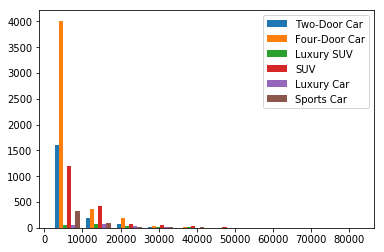

In [18]:
from collections import Counter
from matplotlib import pyplot as plt

# plot_histogram(veh_class)
keys = list(veh_class.keys())
plt.hist((veh_class[keys[0]],veh_class[keys[1]],veh_class[keys[2]],veh_class[keys[3]],veh_class[keys[4]],veh_class[keys[5]]), 10,label = (keys[0],keys[1],keys[2],keys[3],keys[4],keys[5]))
plt.legend()

In [19]:
veh_class.keys()

dict_keys(['Two-Door Car', 'Four-Door Car', 'Luxury SUV', 'SUV', 'Luxury Car', 'Sports Car'])

In [20]:
# Correlation of continuos variables.
CLV = []
income = []
monthly_premium = []
total_claim_amount = []
for i in range(len(data)):
    income.append(data[i][var2ord['Income']])
    monthly_premium.append(data[i][var2ord['Monthly Premium Auto']])
    total_claim_amount.append(data[i][var2ord['Total Claim Amount']])
    CLV.append(data[i][var2ord['Customer Lifetime Value']])
print(np.corrcoef(CLV, income))

[[1.         0.02436566]
 [0.02436566 1.        ]]


In [21]:
### Correlations of DATASET
print(data_df.corr())

                               Customer Lifetime Value    Income  \
Customer Lifetime Value                       1.000000  0.024366   
Income                                        0.024366  1.000000   
Monthly Premium Auto                          0.396262 -0.016665   
Months Since Last Claim                       0.011517 -0.026715   
Months Since Policy Inception                 0.009418 -0.000875   
Number of Open Complaints                    -0.036343  0.006408   
Number of Policies                            0.021955 -0.008656   
Total Claim Amount                            0.226451 -0.355254   

                               Monthly Premium Auto  Months Since Last Claim  \
Customer Lifetime Value                    0.396262                 0.011517   
Income                                    -0.016665                -0.026715   
Monthly Premium Auto                       1.000000                 0.005026   
Months Since Last Claim                    0.005026                

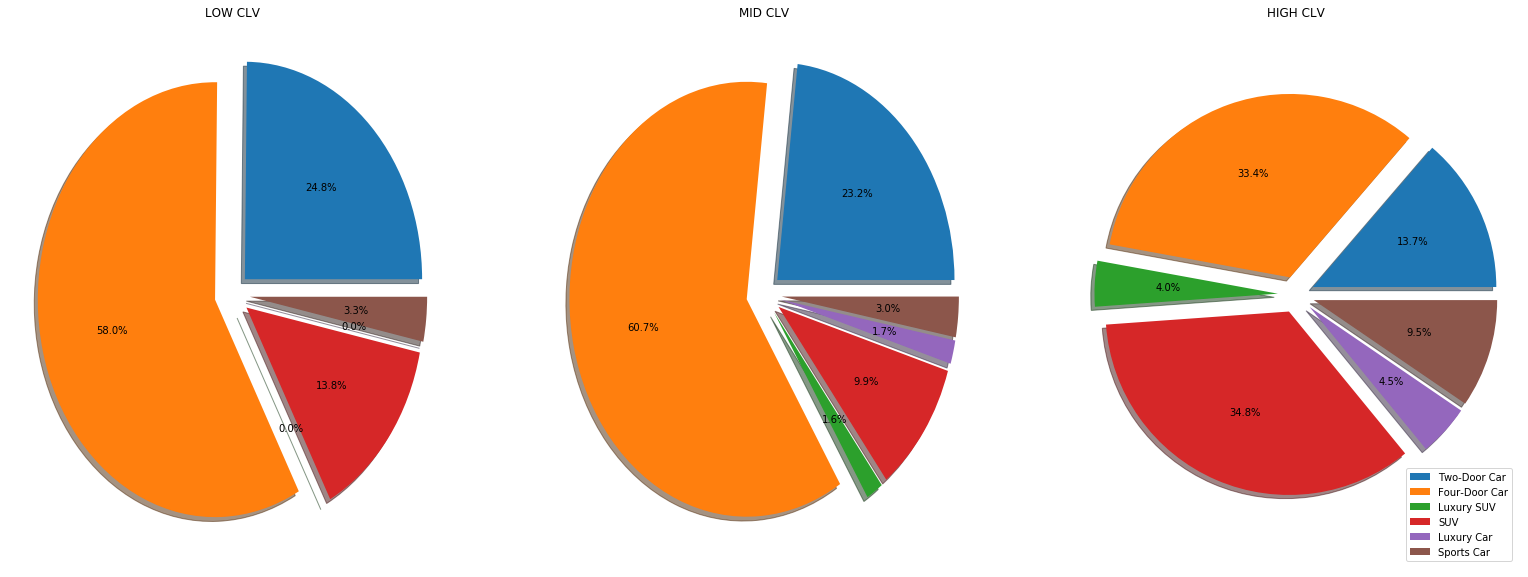

In [22]:
## DRAWING THE PIE CHARTS SHOWING THE DISTRIBUTION OF CLASSES AT DIFFERENT
## VALUES OF CLV

# import numpy as np
# education = cat_var_CLV(data, 'Education')
# state = cat_var_CLV(data, 'State')
# response = cat_var_CLV(data, 'Response')
# coverage = cat_var_CLV(data, 'Coverage')
# gender = cat_var_CLV(data, 'Gender')
# employ_status = cat_var_CLV(data, 'EmploymentStatus')
# martial_stat = cat_var_CLV(data, 'Marital Status')
# policy_type = cat_var_CLV(data, 'Policy Type')
# policy = cat_var_CLV(data, 'Policy')
# offer = cat_var_CLV(data, 'Renew Offer Type')
# veh_class = cat_var_CLV(data, 'Vehicle Class')
# veh_size = cat_var_CLV(data, 'Vehicle Size')
# sales_ch = cat_var_CLV(data, 'Vehicle Size')


def plot_pie_chart(CLV, dictionary):
    # Thresholds for Low, Mid and High
    low = 5000
    mid = np.mean(CLV)
    high = max(CLV)
    
    # Dictionaries to save the counts of CLV in each bin
    low_val = {}
    mid_val = {}
    high_val = {}
    for i in dictionary.keys():
        l = 0
        m = 0
        h = 0
        #print(len(dictionary[i]))
        for j in dictionary[i]:
            if j <= low:
                l += 1
            elif j>low and j<=mid:
                m += 1
            else:
                h += 1
        low_val[i] = l
        mid_val[i] = m
        high_val[i] = h

    # PIE CHART FORMATION
    labels = dictionary.keys()
    sizes1 = low_val.values()
    sizes2 = mid_val.values()
    sizes3 = high_val.values()
    explode = [0.1]*len(sizes1)


    fig, (pie1, pie2, pie3) = plt.subplots(nrows = 1, ncols = 3, figsize = (27,10))
    pie1.pie(sizes1, explode = explode, autopct='%1.1f%%',shadow = True)
    pie1.title.set_text('LOW CLV')
    pie2.pie(sizes2, explode = explode, autopct='%1.1f%%',shadow = True)
    pie2.title.set_text('MID CLV')
    pie3.pie(sizes3, explode = explode, autopct='%1.1f%%',shadow = True)
    pie3.title.set_text('HIGH CLV')

    plt.axis('equal')
    plt.legend(labels, loc = 'lower right')
    #plt.title('DISTRIBUTION OF CLV WRT', )
    plt.show()
    
# Enter the name of the dictionary as given in the comment as second argument.
plot_pie_chart(CLV, veh_class)

(array([7.260e+03, 1.193e+03, 4.130e+02, 1.540e+02, 7.500e+01, 2.000e+01,
        1.000e+01, 5.000e+00, 3.000e+00, 1.000e+00]),
 array([ 1898.007675 , 10040.7450265, 18183.482378 , 26326.2197295,
        34468.957081 , 42611.6944325, 50754.431784 , 58897.1691355,
        67039.906487 , 75182.6438385, 83325.38119  ]),
 <a list of 10 Patch objects>)

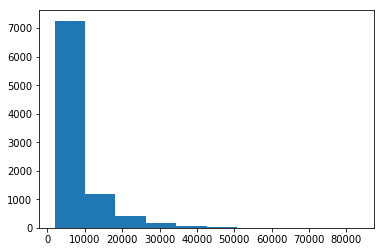

In [23]:
plt.hist(CLV)